In [1]:
# Import all the requisite libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from scipy.optimize import fmin_tnc
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
#Read in Data
df = pd.read_csv('groups8_47759_9725490_heartDiseaseData.csv')
df = df.dropna() #Removing all the missing values
df.head() # General Information of the imported data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [4]:
df.describe() # Some Statical information of the imported data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


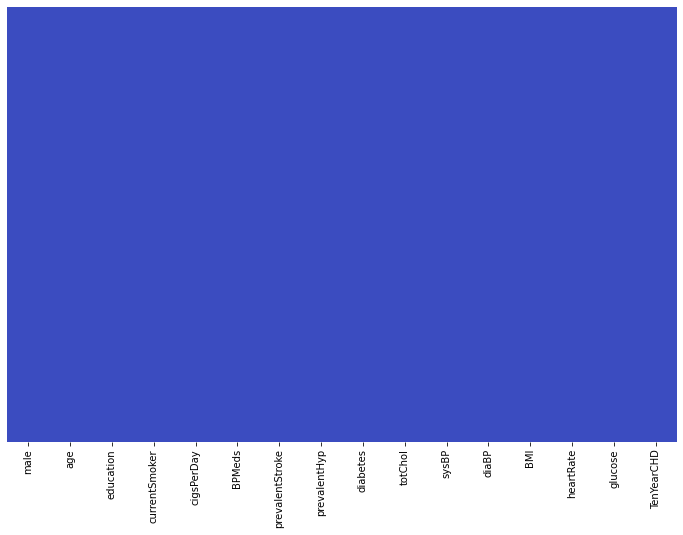

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

### No missing data in the columns confirmed through Heatmap plot, so no need for data cleaning

### Split the data into Train and Test Set

In [6]:
# Training & Testing Data

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# perform a 7:3 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 6)


### Rescalling Values

In [7]:
#Rescaling values

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Logistic Regression with Scikit-Learn 

### Bias Variance Trade Off

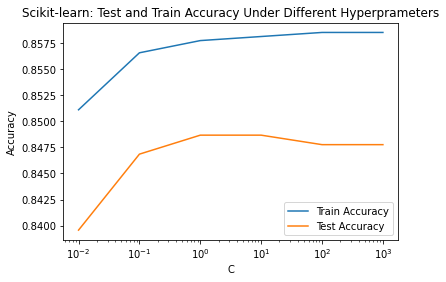

In [8]:
result_list = []

# Create a list of tunning value fir C
C_list = [0.01, 0.1, 1, 10, 100, 1000] 

# Tunning hyperparameter C for the created training model
for C in C_list :
    classifier = LogisticRegression(C=C, penalty='l1', solver='saga')
    classifier.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    result_list.append((C, train_accuracy, test_accuracy))

result_df = pd.DataFrame(result_list, columns=["C", "Train Accuracy", "Test Accuracy"])
plot = result_df.plot(x="C", y=["Train Accuracy", "Test Accuracy"],  logx=True, title = 'Scikit-learn: Test and Train Accuracy Under Different Hyperprameters')
plot.set_xlabel('C')
plot.set_ylabel('Accuracy')
plt.show()

As C becomes larger, train accuract always goes large, but test accuracy decreses if C is too large. Test accruracy descreased because large C would cause overfitting the training data. Even though it resulces the bias, it creates a large variance and reduces the test accuracy. For our model, C = 1 gives  the highesr testing accruracy.

### Hyperparameter Tunning with Grid Search

In [9]:
class_weight_list = ['auto', 'balanced']
solver_list =  ['liblinear','saga']
C_list = C_list

param_grid = [
  {'C': C_list, 'solver': solver_list, 'class_weight': class_weight_list}
 ]

model = LogisticRegression(penalty = 'l1')
model_cv = GridSearchCV(model, param_grid ,cv=10)
model_cv.fit(X_train,y_train)
y_test_pred = model_cv.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("train accuracy :", model_cv.best_score_)
print("test accuracy :", test_accuracy)

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'auto', 'solver': 'saga'}
train accuracy : 0.8561902573529412
test accuracy : 0.8486782133090246


### Model Perfomance

#### Plot ROC Curve

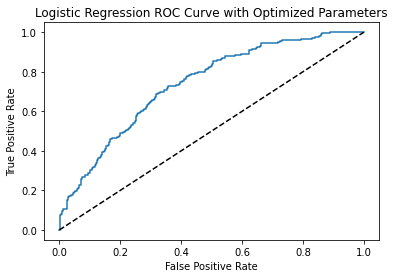

In [10]:
 #Show ROC Curve on test data

y_pred_prob = model_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve with Optimized Parameters')

plt.show()


#### Creat Confusing Matrix

In [11]:
# Creating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)   

[[918   3]
 [163  13]]


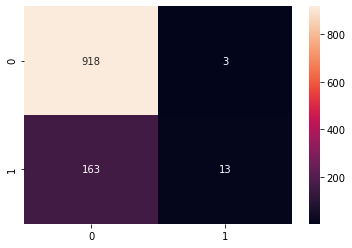

In [12]:
plot = sns.heatmap(conf_matrix, annot=True, fmt = 'g')

#### Classification Report

In [13]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       921
           1       0.81      0.07      0.14       176

    accuracy                           0.85      1097
   macro avg       0.83      0.54      0.53      1097
weighted avg       0.84      0.85      0.79      1097



#### Plot Learning Curve

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

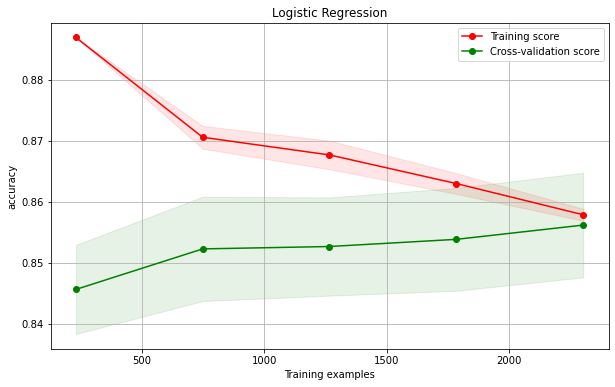

In [15]:
plot= plot_learning_curve(LogisticRegression(C = 1, class_weight='auto', solver= 'saga', penalty= 'l1'), 'Logistic Regression', X_train, y_train, cv=10)

Training & Cross-validation Score almost have the same values as number of training examples are increasing, Models looks good for prediction

# Logistic Regression from Scratch

### Parameter $\theta$:
$\boldsymbol{\theta} = [\theta_0, \theta_1, ..., \theta_n]^T$

### Hypothesis:
$H_\boldsymbol{\theta}(\boldsymbol{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^{T}\boldsymbol{x}}}$

### For L1 regulazation, cost function:
### $J(\boldsymbol{\theta}) = \frac{1}{m}\Vert\boldsymbol{{\theta}}\Vert - C \frac{1}{m} \sum_{j=1}^m{y^{(j)}\log{(h_\boldsymbol{\theta} (x^{(j)}))} + (1 - y^{(j)})\log{(1-h_\boldsymbol{\theta} (x^{(j)}))}}$

### Gradient of the cost function is
$\frac{{\partial J(\boldsymbol{\theta)}}}{\partial \theta_i} = \frac{1}{m} + C \frac{1}{m} \sum_{j=1}^m (h_{\boldsymbol{\theta}} (\boldsymbol{x}^{(j)})-y^{(j)})x_i^{(j)}$

$\nabla J(\boldsymbol{\theta})= \frac{1}{m} + C\frac{1}{m}((H_{\boldsymbol{\theta}}(\boldsymbol{x}) -\boldsymbol{y}) \cdot \boldsymbol{x}^T)$

In [16]:
# Tranpose X and insert a row of 1 as first row
x_train = np.insert(X_train.T, 0, 1, axis=0)
x_test = np.insert(X_test.T, 0, 1, axis=0)

In [17]:
# Defining different mathematical functions  

def hypothesis(theta, x):
    # Returns the H(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))

def cost_function(theta, x, y, C):
    # Computes the cost function
    m = X.shape[0]

    total_cost =  1/m*np.linalg.norm(theta, 1) - C * (1 / m) * np.sum(
        y * np.log(hypothesis(theta, x)) + (1 - y) * np.log(
            1 - hypothesis(theta, x)))
    return total_cost

def gradient(theta, x, y, C):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[1]
    return C * (1 / m) * np.dot(hypothesis(theta, x) - y, x.T) + 1/m

def fit(x, y, C):
    # Use scipy.optimize.fmin_tnc to find parameters minimize the cost function
    theta = np.zeros((1, X.shape[1]+1))
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y, C))
    parameter = opt_weights[0].T
    return parameter

def predict(x, theta, probab_threshold=0.5):
    # Predict the label using the x and parameters, with a default probability threshold 0.5
    y_pred = (hypothesis(theta, x) >= probab_threshold).astype(int).flatten()
    return y_pred


### Bias-Variance Trade-off

In [18]:
# Tunning Hyperparameter C to show bias-variance trade-off
result_list = []
for C in C_list:
    # Initiate theta as an vertical vector
    theta = fit(x_train, y_train, C)
    y_train_pred = predict(x_train, theta)
    y_test_pred = predict(x_test, theta)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    result_list.append((C, train_accuracy, test_accuracy))

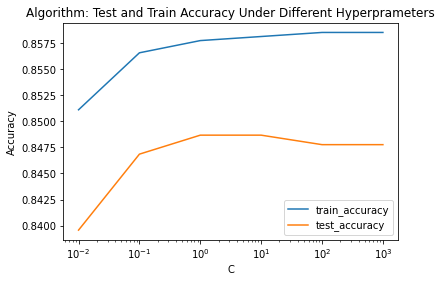

In [19]:
result_df = pd.DataFrame(result_list, columns=["C", "train_accuracy", "test_accuracy"])
plot = result_df.plot(x="C", y=["train_accuracy", "test_accuracy"],  logx=True, title = 'Algorithm: Test and Train Accuracy Under Different Hyperprameters')
plot.set_xlabel('C')
plot.set_ylabel('Accuracy')
plt.show()

### Tuning Hyperparameter C with Cross Validation - Without scikit learn module

In [20]:
def kfold_split(x, y, folds):
    # Generate the indexes for each fold
    index_list = []
    fold_size = x.shape[1] // folds
    for i in range(folds):
        if i == folds - 1:
            index_list.append((fold_size*i, x_train.shape[1]))
        else:
            index_list.append((fold_size*i, fold_size*(i+1)))
    return index_list

def cross_validation(x, y, C_list, folds):
    # Get a list of mean accruacy scores for each hyperparameter value using across validation
    index_list = kfold_split(x, y, folds)
    scores = []
    for C in C_list:
        accuracy_score_list = []
        for j in range(folds):
            start, end = index_list[j]
            # get training and validation sets
            x_cv_vad = x[:, start: end]
            y_cv_vad = y[start: end]
            x_cv_train = np.delete(x, range(start,end,1), axis = 1)
            y_cv_train = pd.Series(np.delete(np.array(y), range(start,end,1)))

            # fit the logistic regression model with training set            
            theta = fit(x_cv_train, y_cv_train, C)
            # predict the result using validation set and get the accuracy_score
            y_cv_vad_pred = predict(x_cv_vad, theta)
            accuracy = accuracy_score(y_cv_vad, y_cv_vad_pred)
            accuracy_score_list.append(accuracy)
        score = np.mean(accuracy_score_list)
        scores.append(score)
    return scores

In [21]:
# use 5 folds to reduce running time
cross_validation_scores = cross_validation(x_train, y_train, C_list, 5)
C = C_list[np.argmax(cross_validation_scores)]
print('Hyperparameter gives the best cross_validation_score is C =', C)

Hyperparameter gives the best cross_validation_score is C = 1


### Through both ways, the value of C=1 remains same

### Model Perfomance



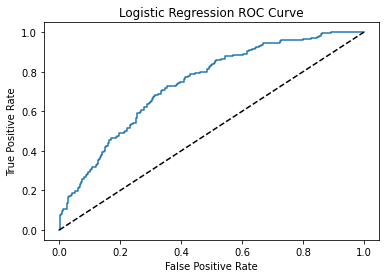

In [22]:
fpr, tpr, thresholds = roc_curve(y_test,hypothesis(theta, x_test))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [23]:
theta = fit(x_train, y_train, C)
y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)

In [24]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[918   3]
 [163  13]]


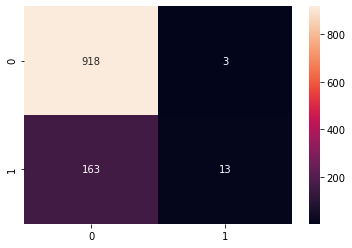

In [25]:
sns.heatmap(conf_matrix, annot=True, fmt = 'g')
plt.show()

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       921
           1       0.81      0.07      0.14       176

    accuracy                           0.85      1097
   macro avg       0.83      0.54      0.53      1097
weighted avg       0.84      0.85      0.79      1097

